# Board segmentation: exploration and demonstration
This notebook demonstrate how we segment an image of board of cards into individual images of cards.  
In the input image of the board, the cards must be aligned to the edge of the image.

In [25]:
import sys
sys.path.append('../')

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import cv2
import segmentboard.segmentboard as segb
from utils.format import bgr2rgb

from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
# choose the image you want to process
# IMG_PATH = '../../data/raw/jpg/IMG_20170518_204827.jpg'
IMG_PATH = '../../data/raw/jpg/IMG_20170617_164602.jpg'

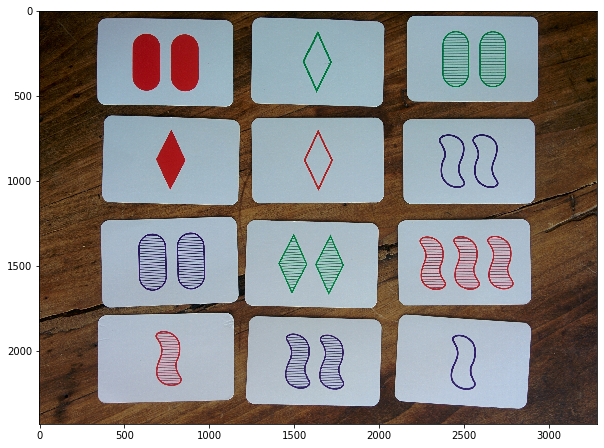

In [56]:
# display input image
img = bgr2rgb(cv2.imread(IMG_PATH))
plt.figure(figsize = (10,10))
plt.imshow(img);

## `binarize_image()` and `add_frame()`
An RBG image of a board of cards is binarized in black and white (`binarize_image`) and we ensure the edge of the resulting image is black by turning edge pixels to black (`add_frame`)

In [57]:
# convert BGR image to RGB
img = bgr2rgb(cv2.imread(IMG_PATH))
# binarize
bin_img = segb.binarize_image(img)
# turn edge pixels to black (edge is by default of 10 pixels width)
framed_bin_img = segb.add_frame(bin_img)

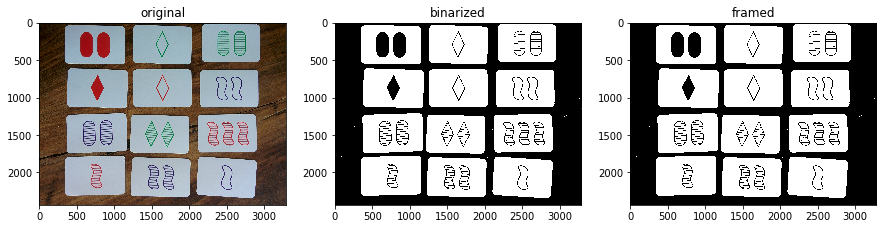

In [58]:
# display results
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(bin_img, cmap=plt.cm.gray);
plt.title('binarized')

plt.subplot(1, 3, 3)
plt.imshow(framed_bin_img, cmap=plt.cm.gray)
plt.title('framed');

## `mean_row_col()`
For each of the three images (original, binarized, and binarized plus framed) we compute the mean pixel values of the rows and of the columns.

In [59]:
mean_row, mean_col = segb.mean_row_col(img)
mean_row_bin, mean_col_bin = segb.mean_row_col(bin_img)
mean_row_fra, mean_col_fra = segb.mean_row_col(framed_bin_img)

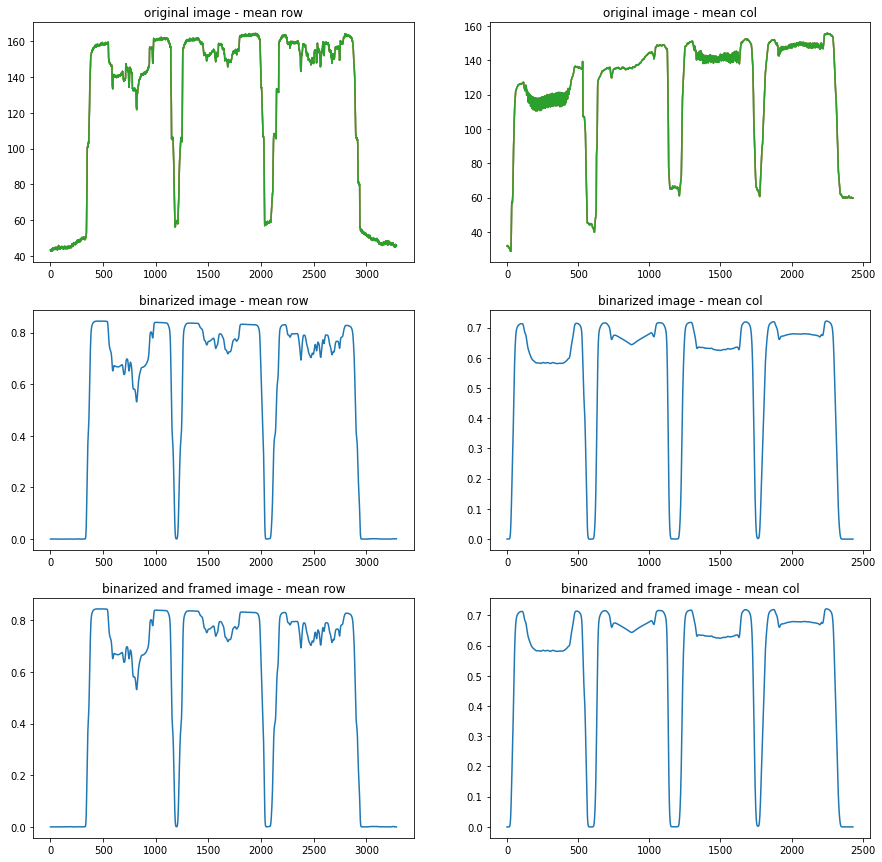

In [60]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.plot(mean_row)
plt.title('original image - mean row')

plt.subplot(3, 2, 2)
plt.plot(mean_col)
plt.title('original image - mean col')

plt.subplot(3, 2, 3)
plt.plot(mean_row_bin)
plt.title('binarized image - mean row')

plt.subplot(3, 2, 4)
plt.plot(mean_col_bin)
plt.title('binarized image - mean col')

plt.subplot(3, 2, 5)
plt.plot(mean_row_fra)
plt.title('binarized and framed image - mean row')

plt.subplot(3, 2, 6)
plt.plot(mean_col_fra)
plt.title('binarized and framed image - mean col');

## `lower_cut_points`
The goal is then to find the vertical and horizontal lines that delimitates the edges of the cards.  

Given a 1d array, function `lower_cut_points` returns the indices of the nearest values below a given threshold value (+/- 1 index value).  

In [61]:
# simple first example
ex_arr = np.array([0., 0.1, 0.2, 0.5, 0.5, 0.3, 0.2, 0.1, 0.])
segb.lower_cut_points(ex_arr, threshold=0.25)

array([2, 5])

In [62]:
# exampe on mean_row_fra
segb.lower_cut_points(mean_row_fra, threshold=0.20)

array([ 346, 1173, 1222, 2029, 2111, 2927])

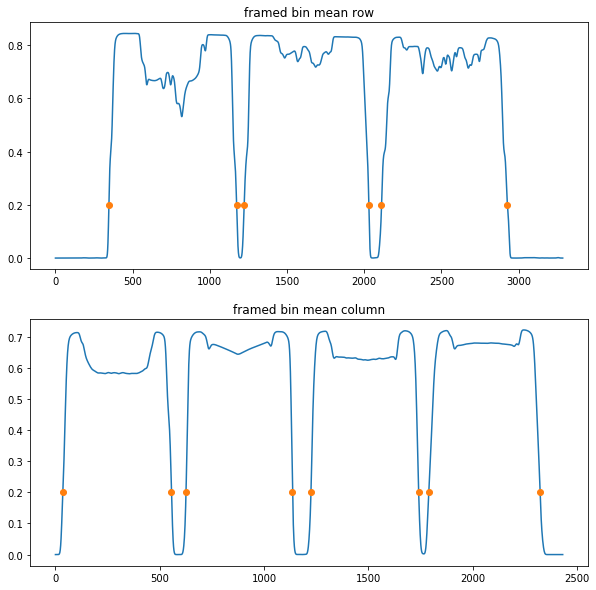

In [63]:
# visualisation of the cut points for row and column mean values
thres = 0.20

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('framed bin mean row')
plt.plot(mean_row_fra);
cut_points_row = segb.lower_cut_points(mean_row_fra, thres)
plt.plot(cut_points_row, np.ones(len(cut_points_row)) * thres, 'o')

plt.subplot(2, 1, 2)
plt.title('framed bin mean column')
plt.plot(mean_col_fra);
cut_points_col = segb.lower_cut_points(mean_col_fra, thres)
plt.plot(cut_points_col, np.ones(len(cut_points_col)) * thres, 'o');

## all in one with `extract-cards`

In [64]:
cards = segb.extract_cards(img, background_thres=0.25)

12 cards segmented.


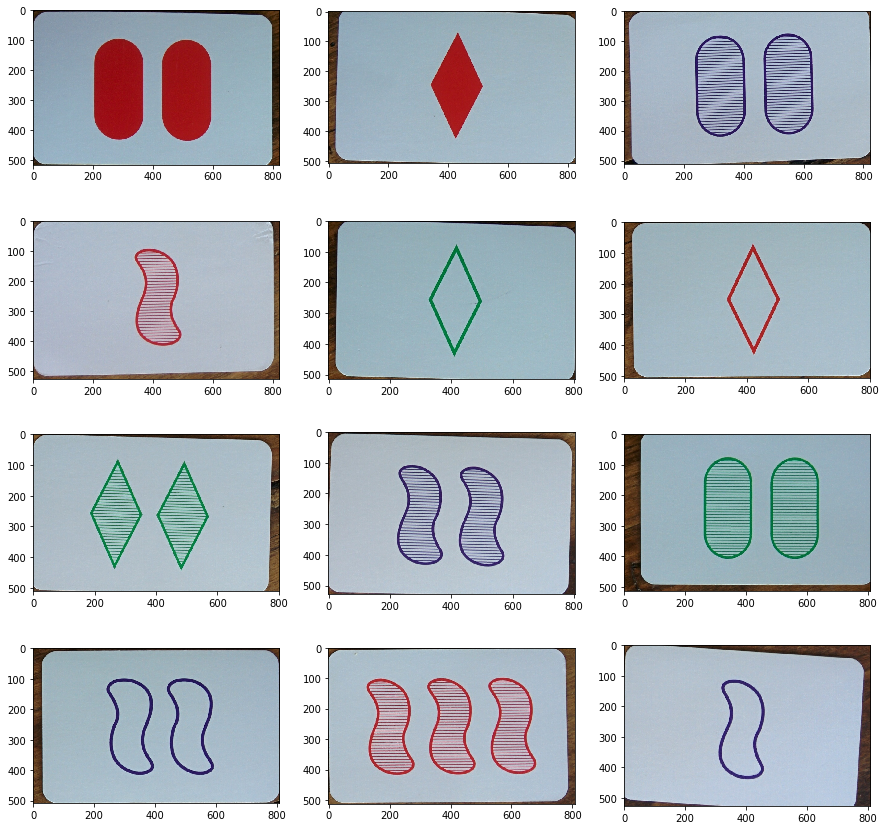

In [65]:
# display segmented cards
plt.figure(figsize=(15, 15))

nb_cards = len(cards)
nb_cols = 3
nb_rows = nb_cards // nb_cols
for i, card in enumerate(cards):
    plt.subplot(nb_rows, nb_cols, i + 1)
    plt.imshow(card);